# Analisis Peluang Penerimaan Lulusan Siswa Baru

### Disusun Oleh Muhammad Rozi Ilham

________________________________________________________________________________________________________________________
Dataset ini dibuat oleh Mohan S Acharya untuk memperkirakan peluang penerimaan lulusan dari perspektif pendidikan di India. Analisis ini akan membantu dalam memahami faktor-faktor apa yang penting dalam penerimaan lulusan dan bagaimana faktor-faktor ini saling terkait satu sama lain. Ini juga akan membantu memprediksi peluang seseorang untuk masuk mengingat variabel-variabel lainnya.

Sumber data : https://bucketlatihanojik.s3.amazonaws.com/Admission_Predict.csv


##  1. Scatter Plot untuk masing-masing features

Pertama yang dilakukan adalah meload data yang akan digunakan. Disini data yang digunakan di simpan di buket s3 aws.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('E:\\Dataset\Admission_Predict.csv')
df.head()

Serial No.  GREScore  TOEFLScore  UniversityRating  SOP  LOR   CGPA  \
0           1       337         118                 4  4.5   4.5  9.65   
1           2       324         107                 4  4.0   4.5  8.87   
2           3       316         104                 3  3.0   3.5  8.00   
3           4       322         110                 3  3.5   2.5  8.67   
4           5       314         103                 2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

Setelah data di dapatkan, mari sedikit kita lihat penjabaran atau statistik deskriptifnya.

In [2]:
df.describe()

Serial No.    GREScore  TOEFLScore  UniversityRating         SOP  \
count  400.000000  400.000000  400.000000        400.000000  400.000000   
mean   200.500000  316.807500  107.410000          3.087500    3.400000   
std    115.614301   11.473646    6.069514          1.143728    1.006869   
min      1.000000  290.000000   92.000000          1.000000    1.000000   
25%    100.750000  308.000000  103.000000          2.000000    2.500000   
50%    200.500000  317.000000  107.000000          3.000000    3.500000   
75%    300.250000  325.000000  112.000000          4.000000    4.000000   
max    400.000000  340.000000  120.000000          5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362          0.142609  
min      1.000000    6.800000    0.000000          0.340000  
25%      3.000000    8.170000    0.000000          0.640000  
50%      3.500000    8.610000    1.000000          0.730000  
75%      4.000000    9.062500    1.000000          0.830000  
max      5.000000    9.920000    1.000000          0.970000

GRE Score : Nilai test standar untuk dapat masuk ke sekolah graduate di Amerika Serikat.
CGPA : Nilai yang diperoleh dari keseluruhan semester yang telah ditempuh.

### Melihat fitur yang dapat di scatter plot dengan korelasi yang kuat

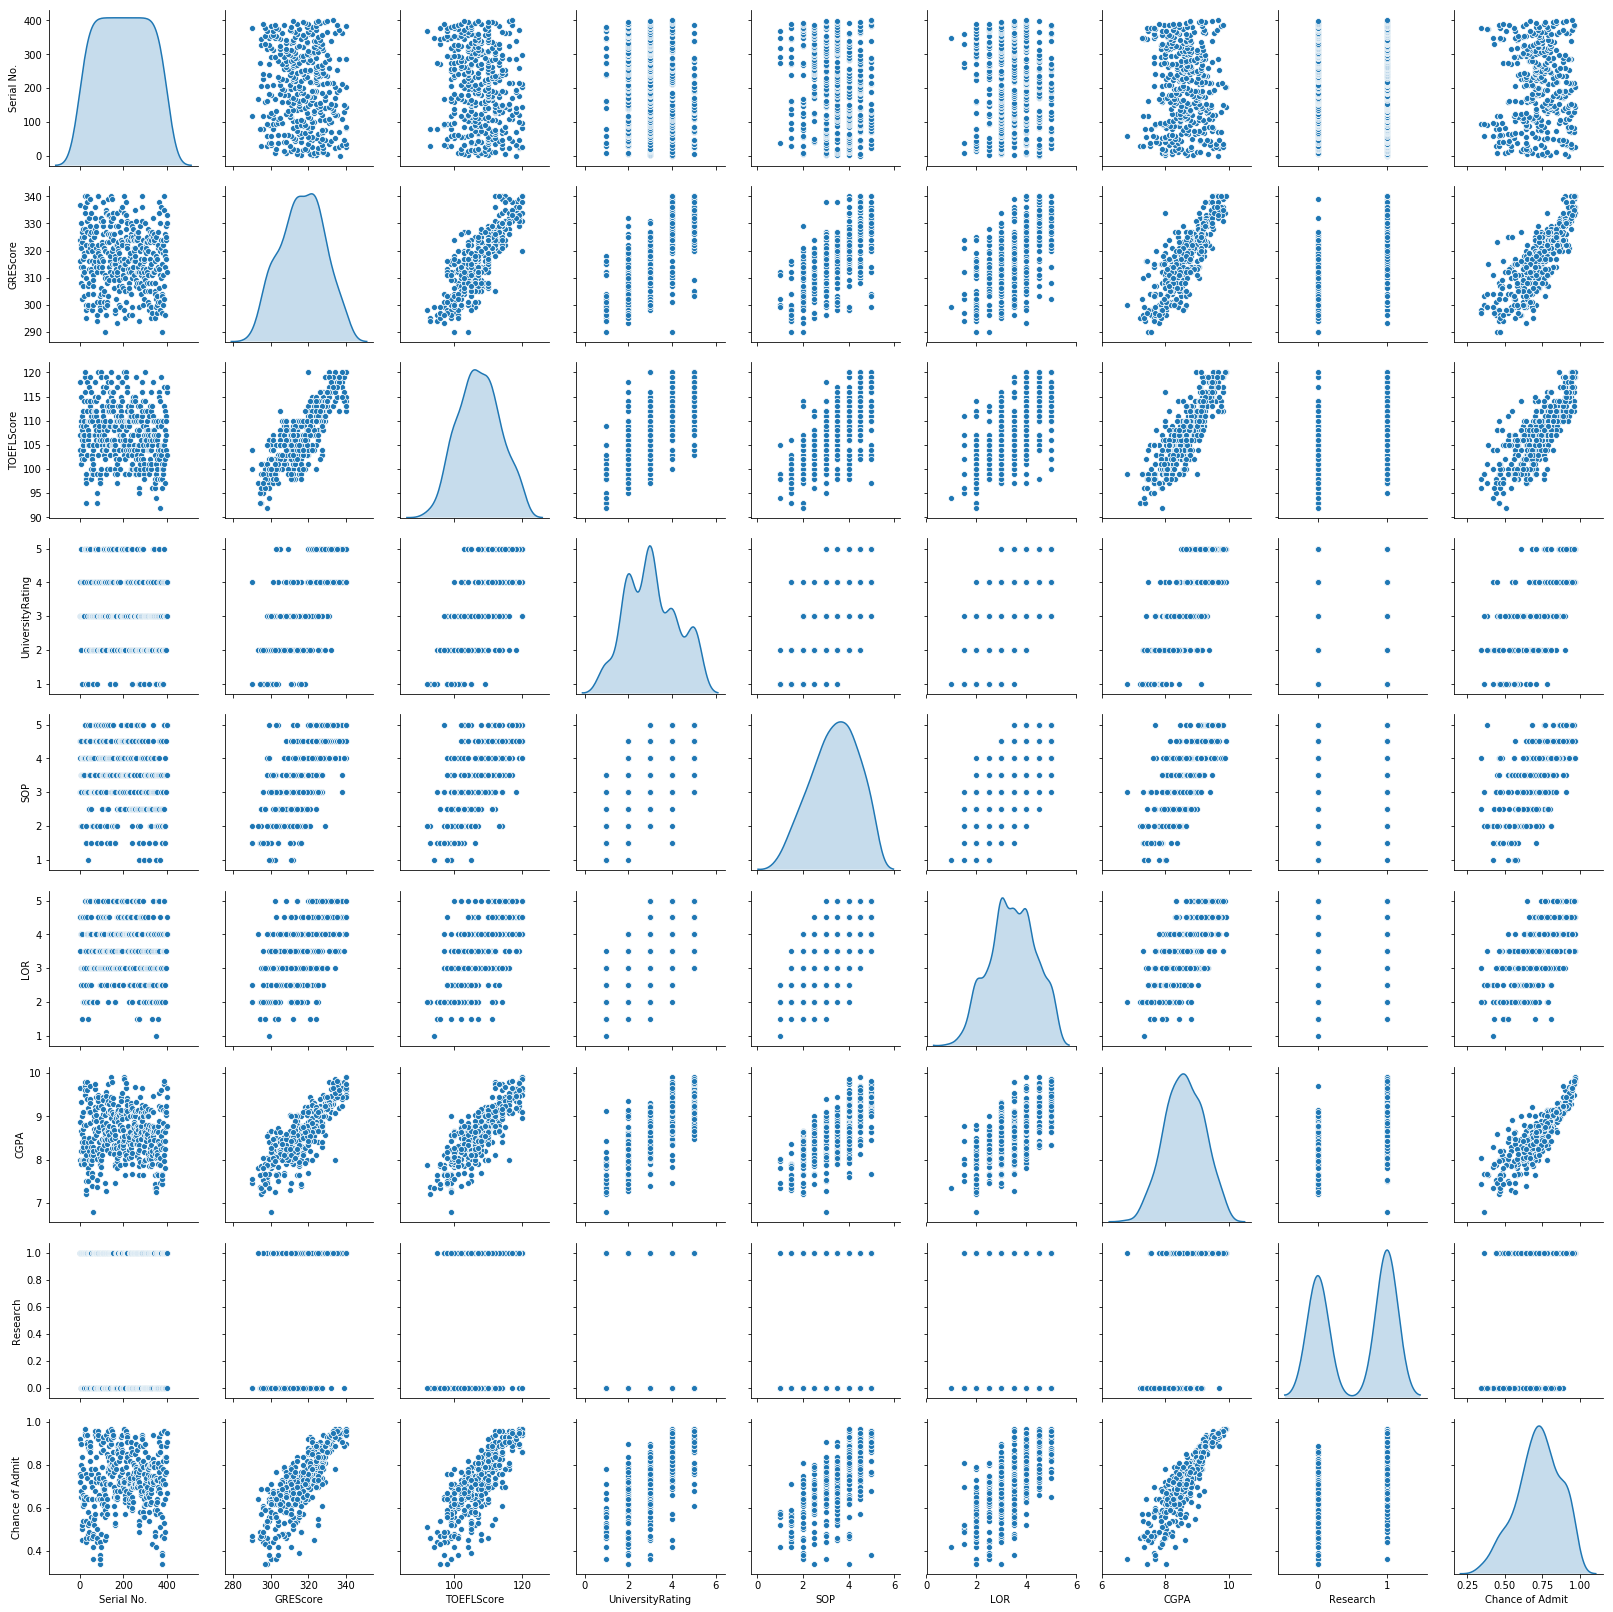

In [4]:
import seaborn as sns   
sns.pairplot(df,diag_kind = 'kde')
plt.show()

Jika dilihat dari plot diatas, ada beberapa kombinasi fitur yang bisa digunakan, diantaranya :
* (TOEFLScore,GREScore),(CGPA,GREScore),(COA,GREScore)
* (GREScore,TOEFLScore),(CGPA,TOEFLScore),(COA,TOEFLScore)
* (GREScore,CGPA),(TOEFLScore,CGPA),(COA,CGPA)
* (GREScore,COA),(TOELScore,COA),(CGPA,COA)
    
Namun, karena dibutuhkan fitur yang memiliki korelasi maka yang dipilih adalah :
    (TOEFLScore,GREScore),(GREScore, COA), (TOEFLScore, COA), (CGPA, COA)

In [7]:
df=df.rename(columns = {'Chance of Admit ':'COA'})

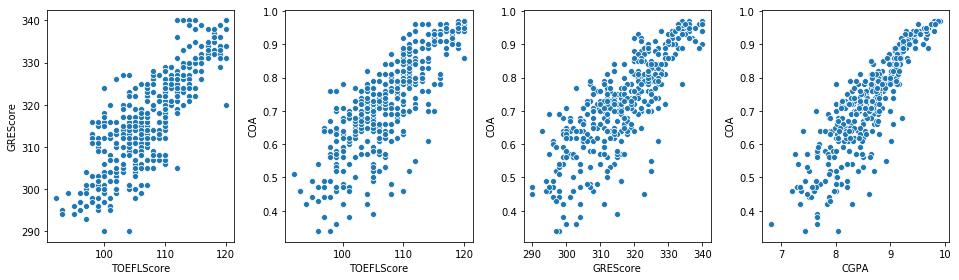

In [10]:
import plotly.express as px
import numpy as np                 
import matplotlib.pyplot as plt    
import seaborn as sns              
%matplotlib inline

plt.figure(figsize=(20,4))

# Test Scatterplot 1
plt.subplot(1,6,1)
sns.scatterplot(x = 'TOEFLScore', y = 'GREScore', data = df)
# R2 = 0.65
plt.subplot(1,6,2)
sns.scatterplot(x = 'TOEFLScore', y = 'COA', data = df)
# R2 = 0.50
plt.subplot(1,6,3)
sns.scatterplot(x = 'GREScore', y = 'COA', data = df)
# R2 = 0.62
plt.subplot(1,6,4)
sns.scatterplot(x = 'CGPA', y = 'COA', data = df)
# R2 = 0.82

plt.tight_layout()

Dari keterangan "Pairplot" dimana terdapat banyak plot, dikecilkan lagi ruanglingkup fitur yang dianggap berkorelasi menjadi 4 scatter plot seperti diatas.

#### Salah 1 cara untuk mengetahui fitur yang berkorelasi kuat adalah dengan melihat nilai R2

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [8]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
#train_x = np.asanyarray(train[['TOEFLScore']])
#train_y = np.asanyarray(train[['GREScore']])

#train_x = np.asanyarray(train[['TOEFLScore']])
#train_y = np.asanyarray(train[['COA']])

#train_x = np.asanyarray(train[['GREScore']])
#train_y = np.asanyarray(train[['COA']])

train_x = np.asanyarray(train[['CGPA']])
train_y = np.asanyarray(train[['COA']])

regr.fit (train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.21283522]]
Intercept:  [-1.10618291]


In [9]:
from sklearn.metrics import r2_score

#test_x = np.asanyarray(test[['TOEFLScore']])
#test_y = np.asanyarray(test[['GREScore']])

#test_x = np.asanyarray(test[['TOEFLScore']])
#test_y = np.asanyarray(test[['COA']])

#test_x = np.asanyarray(test[['GREScore']])
#test_y = np.asanyarray(test[['COA']])

test_x = np.asanyarray(test[['CGPA']])
test_y = np.asanyarray(test[['COA']])

test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )


Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.78


Melihat fitur yang memiliki Korelasi kuat dengan menghubungkan keseluruhan fitur

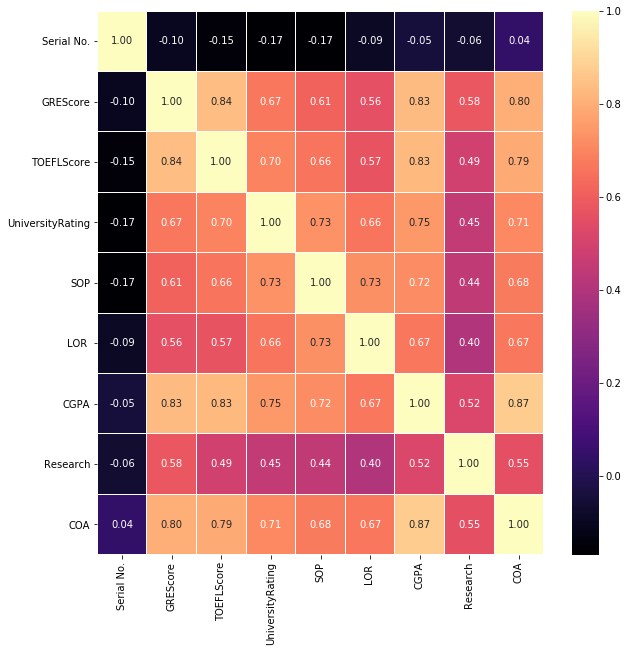

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()


 Hubungan antar fiture juga dapat divisualisasikan dengan melihat nilai terbesar dari matriks diatas. Namun tidak untuk nilai 1.0 karena nilai tersebut pada gambar diatas hanya didapat karena fitur yang dihubungkan adalah fitur itu sendiri. Jadi, berdasarkan gambar diatas, sebaiknya fitur yang digunakan adalah CGPA dan COA

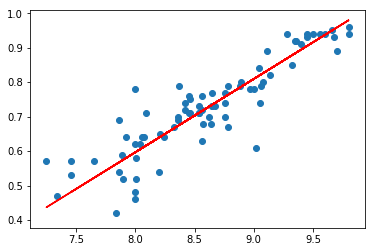

In [11]:
plt.scatter(test_x, test_y)
plt.plot(test_x, test_y_, color='r')
plt.show()

Dari penjabaran nilai R2 yang sudah didapat dan penggambaran scatterplot serta penggambaran menggunakan matriks langsung untuk tiap fitur. Kita lakukan perbandingan terhadap 4 scatter plot sebelumnya untuk menilai mana yang terbaik. Dengan perbandingan diatas didapatlah fitur (CGPA, COA) yang dianggap sebagai fitur dengan korelasi yang kuat. Dimana nilai R2 yang sebelumnya sudah disebutkan adalah sebesar 0.78, dan nilai matriks keseluruhan fitur adalah 0.87

## 2. Statistik deskriptif dari 2 features yang dipilih

In [12]:
mina = np.min(df['CGPA'])
maxa = np.max(df['CGPA'])
meana = np.mean(df['CGPA'])
mediana = np.median(df['CGPA'])
stda = np.std(df['CGPA'])
vara = np.var(df['CGPA'])

minb = np.min(df['COA'])
maxb = np.max(df['COA'])
meanb = np.mean(df['COA'])
medianb = np.median(df['COA'])
stdb = np.std(df['COA'])
varb = np.var(df['COA'])

print("Min CGPA :",mina, '\t\t\t\t\tdan Min COA : ',minb )
print("Max CGPA :",maxa, '\t\t\t\tdan Max COA : ',maxb)
print("Mean CGPA :",meana, '\t\t\tdan Mean COA : ',meanb)
print("Median CGPA :",mediana, '\t\t\t\tdan Median COA : ',medianb)
print("Standar Deviation CGPA :",stda, '\tdan Standar Deviation COA : ',stdb)
print("Variance CGPA :",vara, '\t\tdan Variance COA : ',varb)

Min CGPA : 6.8 					dan Min COA :  0.34
Max CGPA : 9.92 				dan Max COA :  0.97
Mean CGPA : 8.598924999999998 			dan Mean COA :  0.7243499999999996
Median CGPA : 8.61 				dan Median COA :  0.73
Standar Deviation CGPA : 0.5955712336698271 	dan Standar Deviation COA :  0.1424309569580995
Variance CGPA : 0.35470509437499986 		dan Variance COA :  0.020286577499999993


Kita sudah mendapatkan fitur yang memiliki nilai korelasi paling kuat. Dari hal tersebut, mari kita lihat statistik deskriptif pada masing-masing fiturnya.

In [11]:
fig = px.bar(df, x='CGPA', y='COA')
fig.show()

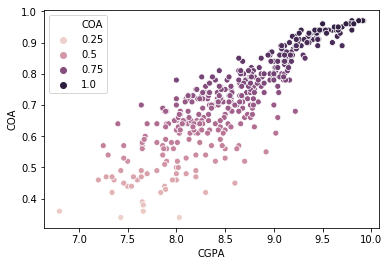

In [15]:
ax = sns.scatterplot(x="CGPA", y="COA", hue="COA", data=df)

Gambar diatas adalah salah satu penggambaran dari fitur yang berkorelasi

## Analisis model regresi linear

In [316]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [317]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['CGPA']])
train_y = np.asanyarray(train[['COA']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.20527485]]
Intercept:  [-1.04134809]


Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.78


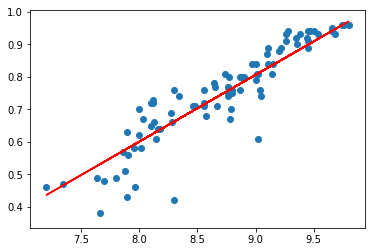

In [323]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['CGPA']])
test_y = np.asanyarray(test[['COA']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
plt.scatter(test_x, test_y)
plt.plot(test_x, test_y_, color='r')
plt.show()

## Analisis Classification

In [371]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [372]:
dataKluster = df[['CGPA', 'COA']]

In [373]:
x_data, y_data = (df["CGPA"].values, df["COA"].values)

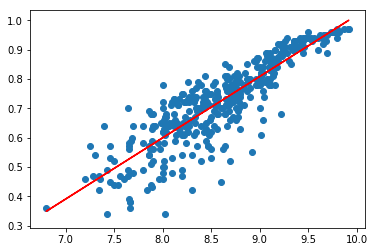

In [374]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_data.reshape(-1, 1), y_data)
y = linreg.predict(x_data.reshape(-1, 1))
plt.scatter(x_data, y_data)
plt.plot(x_data, y, color="red")
#plt.title("View vs Sold")
#plt.xlabel("Jumlah View")
#plt.ylabel("Jumlah terbeli")
plt.show()

In [367]:
print("Koefisien w_1 ...:", linreg.coef_)
print("Intercept (w_0):", linreg.intercept_)

Koefisien w_1 ...: [0.20884723]
Intercept (w_0): -1.0715116629342316


In [350]:
from sklearn.preprocessing import StandardScaler
X = dataKluster.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 1.37364801],
       [ 0.25029671],
       [-0.03054111],
       [ 0.53113453],
       [-0.52200731],
       [ 1.23322909],
       [ 0.18008725],
       [-0.31137894],
       [-1.57514914],
       [-1.92619642],
       [-1.43473023],
       [ 0.81197236],
       [ 0.39071562],
       [-0.73263567],
       [-0.80284513],
       [-1.29431132],
       [-0.45179785],
       [-0.52200731],
       [-0.66242622],
       [-0.73263567],
       [-0.59221676],
       [-0.17096003],
       [ 1.51406692],
       [ 1.58427637],
       [ 1.72469529],
       [ 1.51406692],
       [ 0.25029671],
       [-1.99640588],
       [-1.85598697],
       [-1.29431132],
       [-0.52200731],
       [ 0.1098778 ],
       [ 1.30343855],
       [ 1.23322909],
       [ 1.51406692],
       [ 1.09281018],
       [-0.59221676],
       [-1.0134735 ],
       [-1.43473023],
       [-1.71556806],
       [-1.85598697],
       [-1.6453586 ],
       [-1.36452078],
       [ 1.02260073],
       [ 1.30343855],
       [ 1

In [351]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 1 1 0 1 0 1 1 2 2 2 0 1 1 1 2 1 1 1 1 1 1 0 0 0 0 1 2 2 2 1 1 0 0 0 0 1
 2 2 2 2 2 2 0 0 0 0 0 0 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 2 1 1 0 0 0 0
 1 1 1 1 2 2 2 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 0 0 1 1 1 1 2 1 1 0 0 0 1 1
 1 1 1 2 1 2 2 2 1 0 0 2 1 2 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 1 1 1 1 2 2 2 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 2 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 2 2 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1
 0 0 1 1 1 1 1 1 1 0 1 1 2 2 2 2 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 2 2 2 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 2 2 1 0 1 1 1 1 1 0 1 1 0 2 0 1 1
 1 1 0 1 0 0 0 1 1 2 2 2 2 2 2 2 1 1 1 1 1 2 1 1 1 1 0 0 0 0 1 1 0 1 2 2 1
 1 0 0 1 2 2 2 2 2 1 1 1 0 1 0 0 2 2 2 1 1 1 0 1 0 0 0 0 1 0]


In [352]:
dataKluster["Clus_km"] = labels
dataKluster.head()

C:\Users\email\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



CGPA   COA  Clus_km
0  9.65  0.92        0
1  8.87  0.76        1
2  8.00  0.72        1
3  8.67  0.80        0
4  8.21  0.65        1

In [353]:
KMeansClusterCenter = dataKluster.groupby('Clus_km').mean()
KMeansClusterCenter

CGPA       COA
Clus_km                    
0        9.241953  0.881953
1        8.451010  0.705101
2        7.882432  0.503243

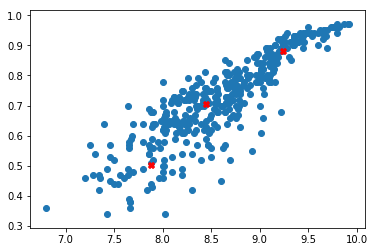

In [356]:
plt.scatter(dataKluster['CGPA'], dataKluster['COA'])
plt.scatter(KMeansClusterCenter['CGPA'], KMeansClusterCenter['COA'], marker = 'X', c = 'r')
plt.show()

In [363]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, k_means.labels_))

0.5674882702861894
